In [1]:
# Libraries

import pandas as pd
import numpy as np

import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
from sklearn.utils import resample
import warnings

warnings.filterwarnings('ignore')



## Load dataset 2020

In [2]:
sinave1 = pd.read_csv('../data/Base-covid-sinave 31012021.csv')

In [3]:
sinave1.head()

,origen,sector,cve_entidad_unidad_medica,entidad_unidad_medica,delegacion_unidad_medica,unidad_medica,fecha_de_registro,sexo,entidad_residencia,cve_entidad_residencia,...,dias_puerperio,antipireticos,unidad_cuidados_intensivos,linaje_influenza_tipo_b,viaje_1,viaje_2,viaje_3,viaje_4,viaje_5,rango_de_edad
0,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UNIDAD MEDICA DEL CENTRO FEMENIL DE READAPTACI...,2020-11-30,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
1,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III MIGUEL HIDALGO,2020-12-11,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-30
2,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-II TEZOZOMOC,2020-12-03,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
3,FUERA DE USMI,SSA,15,MEXICO,MEXICO,HOSPITAL REGIONAL DE ALTA ESPECIALIDAD IXTAPALUCA,2020-05-25,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,SI,NO,NaN,NaN,NaN,NaN,NaN,NaN,31-40
4,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-II SAN ANDRES TOMATLAN,2020-09-04,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-15


In [4]:
sinave1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498288 entries, 0 to 1498287
Data columns (total 91 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   origen                              1498288 non-null  object 
 1   sector                              1498288 non-null  object 
 2   cve_entidad_unidad_medica           1498288 non-null  int64  
 3   entidad_unidad_medica               1498288 non-null  object 
 4   delegacion_unidad_medica            1498288 non-null  object 
 5   unidad_medica                       1498288 non-null  object 
 6   fecha_de_registro                   1498288 non-null  object 
 7   sexo                                1498288 non-null  object 
 8   entidad_residencia                  1498288 non-null  object 
 9   cve_entidad_residencia              1498288 non-null  int64  
 10  municipio_residencia                1498277 non-null  object 
 11  cve_municip

In [5]:
# Gets columns names to list
column_names = list(sinave1.columns)

In [6]:
sinave1.inicio_subito_sintomas.unique()

array(['SI', 'NO', 'SE IGNORA'], dtype=object)

In [7]:
# Removes spaces before and after of each column name
column_names = [x.strip() for x in column_names]

In [8]:
print(column_names)

['origen', 'sector', 'cve_entidad_unidad_medica', 'entidad_unidad_medica', 'delegacion_unidad_medica', 'unidad_medica', 'fecha_de_registro', 'sexo', 'entidad_residencia', 'cve_entidad_residencia', 'municipio_residencia', 'cve_municipio_residencia', 'localidad_residencia', 'clave_localidad_residencia', 'tipo_paciente', 'evolucion_caso', 'fecha_defuncion', 'semana_defuncion', 'intubado', 'diagnostico_clinico_neumonia', 'edad', 'nacionalidad', 'esta_emabarazada', 'meses_embarazo', 'es_indigena', 'habla_lengua_indigena', 'ocupacion', 'servicio_ingreso', 'fecha_ingreso', 'fecha_inicio_sintomas', 'diagnostico_probable', 'fiebre', 'tos', 'odinofagia', 'disnea', 'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios', 'cefalea', 'mialgias', 'artralgias', 'ataque_al_estado_general', 'rinorrea', 'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis', 'cianosis', 'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma', 'inmunosupresivo', 'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_

## Unique values for categorical variables

In [9]:
columns_unique = ['origen',
                         'sector',
                         'cve_entidad_unidad_medica',
                         'entidad_unidad_medica',
                         'delegacion_unidad_medica',
                         'unidad_medica',
                         'sexo',
                         'entidad_residencia',
                         'cve_entidad_residencia',
                         'municipio_residencia',
                         'cve_municipio_residencia',
                         'localidad_residencia',
                         'tipo_paciente', 'evolucion_caso',
                         'intubado',
                         'diagnostico_clinico_neumonia',
                         'edad',
                         'nacionalidad',
                         'esta_emabarazada',
                         'meses_embarazo',
                         'es_indigena',
                         'habla_lengua_indigena',
                         'ocupacion',
                         'servicio_ingreso',
                         'diagnostico_probable',
                         'fiebre',
                         'tos',
                         'odinofagia',
                         'disnea',
                         'irritabilidad', 
                         'diarrea',
                         'dolor_toracico',
                         'calofrios',
                         'cefalea',
                         'mialgias',
                         'artralgias',
                         'ataque_al_estado_general',
                         'rinorrea',
                         'polipnea',
                         'vomito',
                         'dolor_abdominal',
                         'conjuntivitis',
                         'cianosis',
                         'inicio_subito_sintomas',
                         'diabetes',
                         'epoc',
                         'asma',
                         'inmunosupresivo',
                         'hipertension',
                         'VIH_SIDA',
                         'otra_condicion',
                         'enfermedad_cardiaca',
                         'obesidad',
                         'insuficiencia_renal_cronica',
                         'tabaquismo',
                         'recibio_tratamiento',
                         'recibio_tratamiento_antibiotico',
                         'recibio_tratamiento_antiviral',
                         'antiviral', 
                         'contacto_infeccion_viral', 
                         'contacto_aves',
                         'contacto_cerdos',
                         'contacto_animales',
                         'vacunado',
                         'toma_muestra',
                         'laboratorio',
                         'folio_laboratorio',
                         'resultado_definitivo',
                         'es_migrante',
                         'pais_nacionalidad',
                         'pais_origen', 
                         'puerperio',
                         'dias_puerperio',
                         'antipireticos',
                         'unidad_cuidados_intensivos',
                         'linaje_influenza_tipo_b',
                         'rango_de_edad']

In [10]:
for i in columns_unique:
    print(i)
    print('')
    print(sinave1[i].unique())
    print('-----------')

origen

['FUERA DE USMI' 'USMI']
-----------
sector

['SSA' 'IMSS' 'PEMEX' 'PRIVADA' 'ISSSTE' 'SEDENA' 'SEMAR' 'CRUZ ROJA'
 'ESTATAL' 'UNIVERSITARIO' 'IMSS-OPORTUNIDADES' 'DIF' 'MUNICIPAL']
-----------
cve_entidad_unidad_medica

[ 9 15 21  7 17 13 30 24 29 16  4  3 22 12 14 19 10 11  6  5 27 20  8 31
 26 23 25 32 28 18  1  2]
-----------
entidad_unidad_medica

['CIUDAD DE MEXICO' 'MEXICO' 'PUEBLA' 'CHIAPAS' 'MORELOS' 'HIDALGO'
 'VERACRUZ' 'SAN LUIS POTOSI' 'TLAXCALA' 'MICHOACAN' 'CAMPECHE'
 'BAJA CALIFORNIA SUR' 'QUERETARO' 'GUERRERO' 'JALISCO' 'NUEVO LEON'
 'DURANGO' 'GUANAJUATO' 'COLIMA' 'COAHUILA' 'TABASCO' 'OAXACA' 'CHIHUAHUA'
 'YUCATAN' 'SONORA' 'QUINTANA ROO' 'SINALOA' 'ZACATECAS' 'TAMAULIPAS'
 'NAYARIT' 'AGUASCALIENTES' 'BAJA CALIFORNIA']
-----------
delegacion_unidad_medica

['CIUDAD DE MEXICO' 'MEXICO' 'D.F. ZONA NORTE' 'PUEBLA' 'CHIAPAS'
 'MORELOS' 'HIDALGO' 'EDO. DE MEX' 'VERACRUZ' 'SAN LUIS POTOSI' 'TLAXCALA'
 'MICHOACAN' 'CAMPECHE' 'BAJA CALIFORNIA SUR' 'QUERETARO' 'GUERRE

['SI' nan 'NO']
-----------
contacto_aves

['NO' 'SI' nan]
-----------
contacto_cerdos

['NO' 'SI' nan]
-----------
contacto_animales

[nan 'NEGADO' 'NO' ... 'CONEJO PERROS GATOS' 'GATO, PERRO, REPTIL'
 'VENADOS']
-----------
vacunado

['NO' 'SI' 'SE IGNORA' nan]
-----------
toma_muestra

['SI' 'NO']
-----------
laboratorio

['CIENI - INER' nan 'HOSP. IXTAPALUCA' 'INSTITUTO NACIONAL DE NUTRICION'
 'INDRE' 'CIUDAD DE MÉXICO' 'PRIV. CIUDAD DE MÉXICO'
 'INSTITUTO NACIONAL DE MEDICINA GENÓMICA' 'PEMEX' 'IMSS LA RAZA'
 'INSTITUTO NACIONAL DE ENFERMEDADES RESPIRATORIAS' 'MÉDICA SUR'
 'HOSPITAL ANGELES  LOMAS' 'ISSSTE CMN 20 DE NOVIEMBRE'
 'HOSPITAL GENERAL DE MÉXICO' 'PRIV. PUEBLA' 'SEMAR' 'HOSPITAL ABC'
 'INSTITUTO NACIONAL DE PEDIATRÍA' 'LABORATORIO VETERINARIA UNAM'
 'PRIV. EDO. DE MEX' 'HOSPITAL INFANTIL DE MÉXICO FEDERICO GÓMEZ'
 'CHIAPAS' 'PUEBLA' 'ESTUDIOS CLÍNICOS DR.  T.J. ORIARD' 'MORELOS'
 'EDO. DE MEX' 'HOSPITAL JUÁREZ DE MÉXICO' 'PRIV. VERACRUZ'
 'LABORATORIO CARDIOLOGÍA' 'PRIV.

## Missing values

In [11]:
# Calculates the percentage of null registers for each variable and 
# shows columns with percentage of missing values higher than 60%

pd.set_option('display.max_rows', None)
percent_missing = round(sinave1.isnull().sum() * 100 / len(sinave1),2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df[percent_missing > 60]

,percent_missing
fecha_defuncion,97.47
semana_defuncion,97.47
intubado,92.92
meses_embarazo,87.46
antiviral,97.81
fecha_inicio_tratamiento_antiviral,99.02
fecha_estimada_vacunacion,80.31
es_migrante,99.52
pais_nacionalidad,87.46
pais_origen,99.90


In [12]:
# Gets a list of columns with missing values higher than 60%
drop_columns = missing_value_df[percent_missing > 60].index.tolist()

In [13]:
drop_columns

['fecha_defuncion',
 'semana_defuncion',
 'intubado',
 'meses_embarazo',
 'antiviral',
 'fecha_inicio_tratamiento_antiviral',
 'fecha_estimada_vacunacion',
 'es_migrante',
 'pais_nacionalidad',
 'pais_origen',
 'fecha_ingreso_pais',
 'dias_puerperio',
 'unidad_cuidados_intensivos',
 'linaje_influenza_tipo_b',
 'viaje_1',
 'viaje_2',
 'viaje_3',
 'viaje_4',
 'viaje_5']

In [14]:
# Drops columns with missing values higher than 60%
sinave2 = sinave1.copy()

for i in drop_columns:
    sinave2 = sinave2.drop([i], axis=1)

In [15]:
# sinave2.info()

## Variables Format

In [16]:
start_date = '01-01-2020'
end_date = '31-12-2020'

In [17]:
fechas_columns = [col for col in sinave2.columns if 'fecha' in col]
fechas_columns

['fecha_de_registro', 'fecha_ingreso', 'fecha_inicio_sintomas']

In [18]:
for i in fechas_columns:
    
    sinave2[i] = pd.to_datetime(sinave2[i], format='%Y-%m-%d')
    mask = (sinave2[i] > start_date) & (sinave2[i] <= end_date)
    sinave2 = sinave2.loc[mask]

In [19]:
# sinave2.info()

In [20]:
# Creates new date column from 'fecha_de_registro' only getting month and year

sinave2['año_mes_ingreso'] = pd.to_datetime(sinave2['fecha_de_registro']).dt.to_period('M')

## Filter confirmed cases

In [21]:
sinave2.groupby(['resultado_definitivo'])['resultado_definitivo'].count()

resultado_definitivo
A H3                      121
ADENOVIRUS                  4
B                         348
BOCAVIRUS                   1
CORONA 229E                 7
CORONA HKU1                 7
CORONA NL63                16
CORONA OC43                 4
ENTEROV//RHINOVIRUS        55
INF A                      13
INF AH1N1 PMD             325
METAPNEUMOVIRUS            14
NEGATIVO               708513
NO ADECUADO              7019
NO AMPLIFICO               22
NO RECIBIDA              3826
NO SUBTIPIFICADO           90
PARAINFLUENZA 1             3
PARAINFLUENZA 2             1
PARAINFLUENZA 4             1
RECHAZADA               14713
SARS-CoV-2             347180
SIN CELULAS                17
VSR                         8
VSR A                       2
VSR B                       1
Name: resultado_definitivo, dtype: int64

In [22]:
sinave2['vacunado'].value_counts()

NO           906930
SI           218802
SE IGNORA      2381
Name: vacunado, dtype: int64

In [23]:
sinave2['evolucion_caso'].value_counts()

SEGUIMIENTO TERMINADO       523452
EN TRATAMIENTO              261036
SEGUIMIENTO DOMICILIARIO    247906
ALTA - MEJORIA               37787
DEFUNCION                    34083
CASO GRAVE -                 12059
CASO NO GRAVE                 9985
ALTA - VOLUNTARIA             1258
ALTA - TRASLADO                884
REFERENCIA                     437
CASO GRAVE - TRASLADO          406
ALTA - CURACION                195
Name: evolucion_caso, dtype: int64

In [24]:
sinave3 = sinave2[sinave2["resultado_definitivo"] == 'SARS-CoV-2']
sinave3.shape

(347180, 73)

## Group categories

In [25]:
# create a new column from 'evolucion_caso'to group cases
sinave3['estado'] = sinave3['evolucion_caso']

In [27]:
sinave3['estado'].replace(to_replace=['SEGUIMIENTO TERMINADO','EN TRATAMIENTO','SEGUIMIENTO DOMICILIARIO','DEFUNCION','ALTA - MEJORIA',
'CASO GRAVE -','CASO NO GRAVE','ALTA - VOLUNTARIA','ALTA - TRASLADO','CASO GRAVE - TRASLADO','REFERENCIA','ALTA - CURACION'],value=['RECUPERADOS','ACTIVOS LEVES','ACTIVOS LEVES','FALLECIDOS','RECUPERADOS','ACTIVOS GRAVES','ACTIVOS LEVES','RECUPERADOS','RECUPERADOS', 'ACTIVOS GRAVES','ACTIVOS LEVES','RECUPERADOS'],inplace=True)
sinave3['estado'].value_counts()

ACTIVOS LEVES     164458
RECUPERADOS       156965
FALLECIDOS         20096
ACTIVOS GRAVES      5661
Name: estado, dtype: int64

In [28]:
sinave3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347180 entries, 2 to 1498287
Data columns (total 74 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   origen                           347180 non-null  object        
 1   sector                           347180 non-null  object        
 2   cve_entidad_unidad_medica        347180 non-null  int64         
 3   entidad_unidad_medica            347180 non-null  object        
 4   delegacion_unidad_medica         347180 non-null  object        
 5   unidad_medica                    347180 non-null  object        
 6   fecha_de_registro                347180 non-null  datetime64[ns]
 7   sexo                             347180 non-null  object        
 8   entidad_residencia               347180 non-null  object        
 9   cve_entidad_residencia           347180 non-null  int64         
 10  municipio_residencia             347176 non

In [29]:
sinave3["año_mes_ingreso"].value_counts()

2020-12    104216
2020-11     50833
2020-10     40034
2020-09     31619
2020-07     30266
2020-06     28777
2020-08     28585
2020-05     24157
2020-04      8665
2020-03        28
Freq: M, Name: año_mes_ingreso, dtype: int64

In [30]:
# plt.figure(figsize=(10,6))
# sns.violinplot(x='estado', y='edad', data=sinave3, hue='sexo', palette='rainbow')
# plt.title("estado, edad y sexo ")

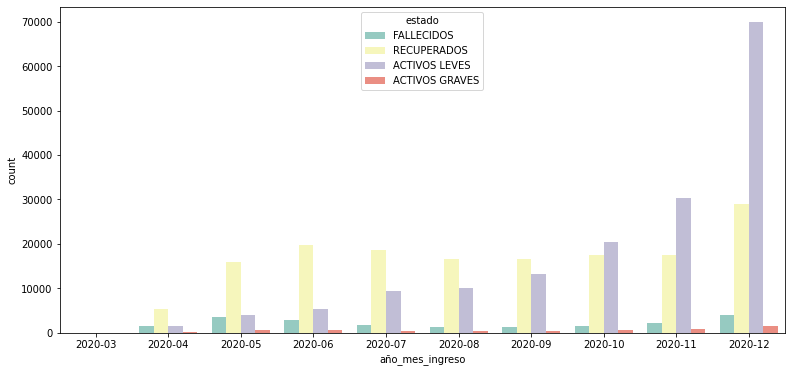

In [31]:
fig, ax = plt.subplots(figsize=(13, 6))
ax = sns.countplot(x = "año_mes_ingreso", hue = "estado", data = sinave3.sort_values(by = "año_mes_ingreso"), palette = "Set3")
# ax = tick_params(rotation = 45)

In [135]:
plt.figure(figsize=(10,20))
# ax = sns.countplot(y="ocupacion", hue="estado", data = sinave3, palette = "Set3")

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [33]:
sinave3_plot = sinave3[(sinave3['estado'] == "RECUPERADOS") | (sinave3['estado'] == "FALLECIDOS")]

In [34]:
sinave3_plot.estado.unique()

array(['RECUPERADOS', 'FALLECIDOS'], dtype=object)

Text(0, 0.5, 'DENSIDAD')

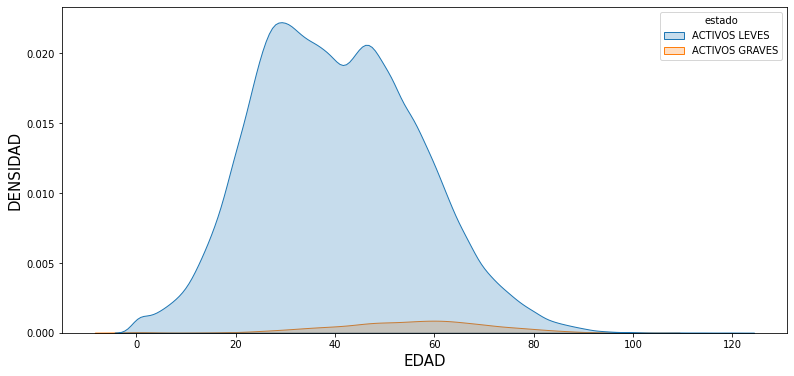

In [35]:
#Grafico densidad de casos activos graves y activos leves

fig, ax = plt.subplots(figsize=(13, 6))

sinave3_plot2 = sinave3[(sinave3['estado'] == "ACTIVOS LEVES") | (sinave3['estado'] == "ACTIVOS GRAVES")]
# use=['Recuperados','Fallecidos']
g = sns.kdeplot(data = sinave3_plot2, x='edad', hue='estado', shade=True)
g.set_xlabel('EDAD', fontsize = 15)
g.set_ylabel('DENSIDAD', fontsize = 15)
# ax.legend(use)

Text(0, 0.5, 'DENSIDAD')

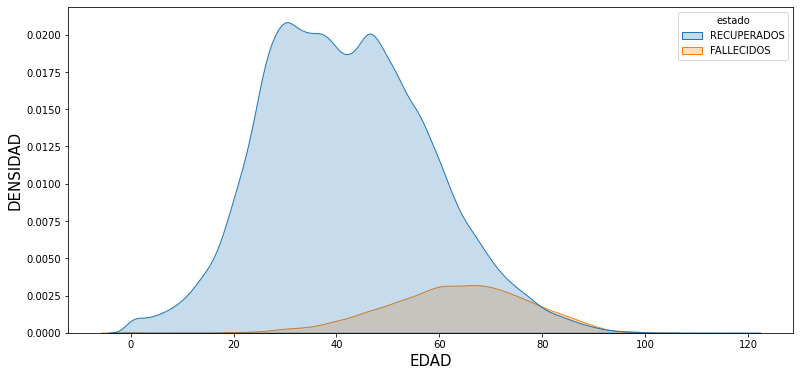

In [36]:
#Grafico densidad de casos Recuperados y Fallecidos

fig, ax = plt.subplots(figsize=(13, 6))

sinave3_plot = sinave3[(sinave3['estado'] == "RECUPERADOS") | (sinave3['estado'] == "FALLECIDOS")]
# use=['Recuperados','Fallecidos']
g = sns.kdeplot(data=sinave3_plot, x='edad', hue='estado', shade=True)
g.set_xlabel('EDAD', fontsize = 15)
g.set_ylabel('DENSIDAD', fontsize = 15)
# ax.legend(use)

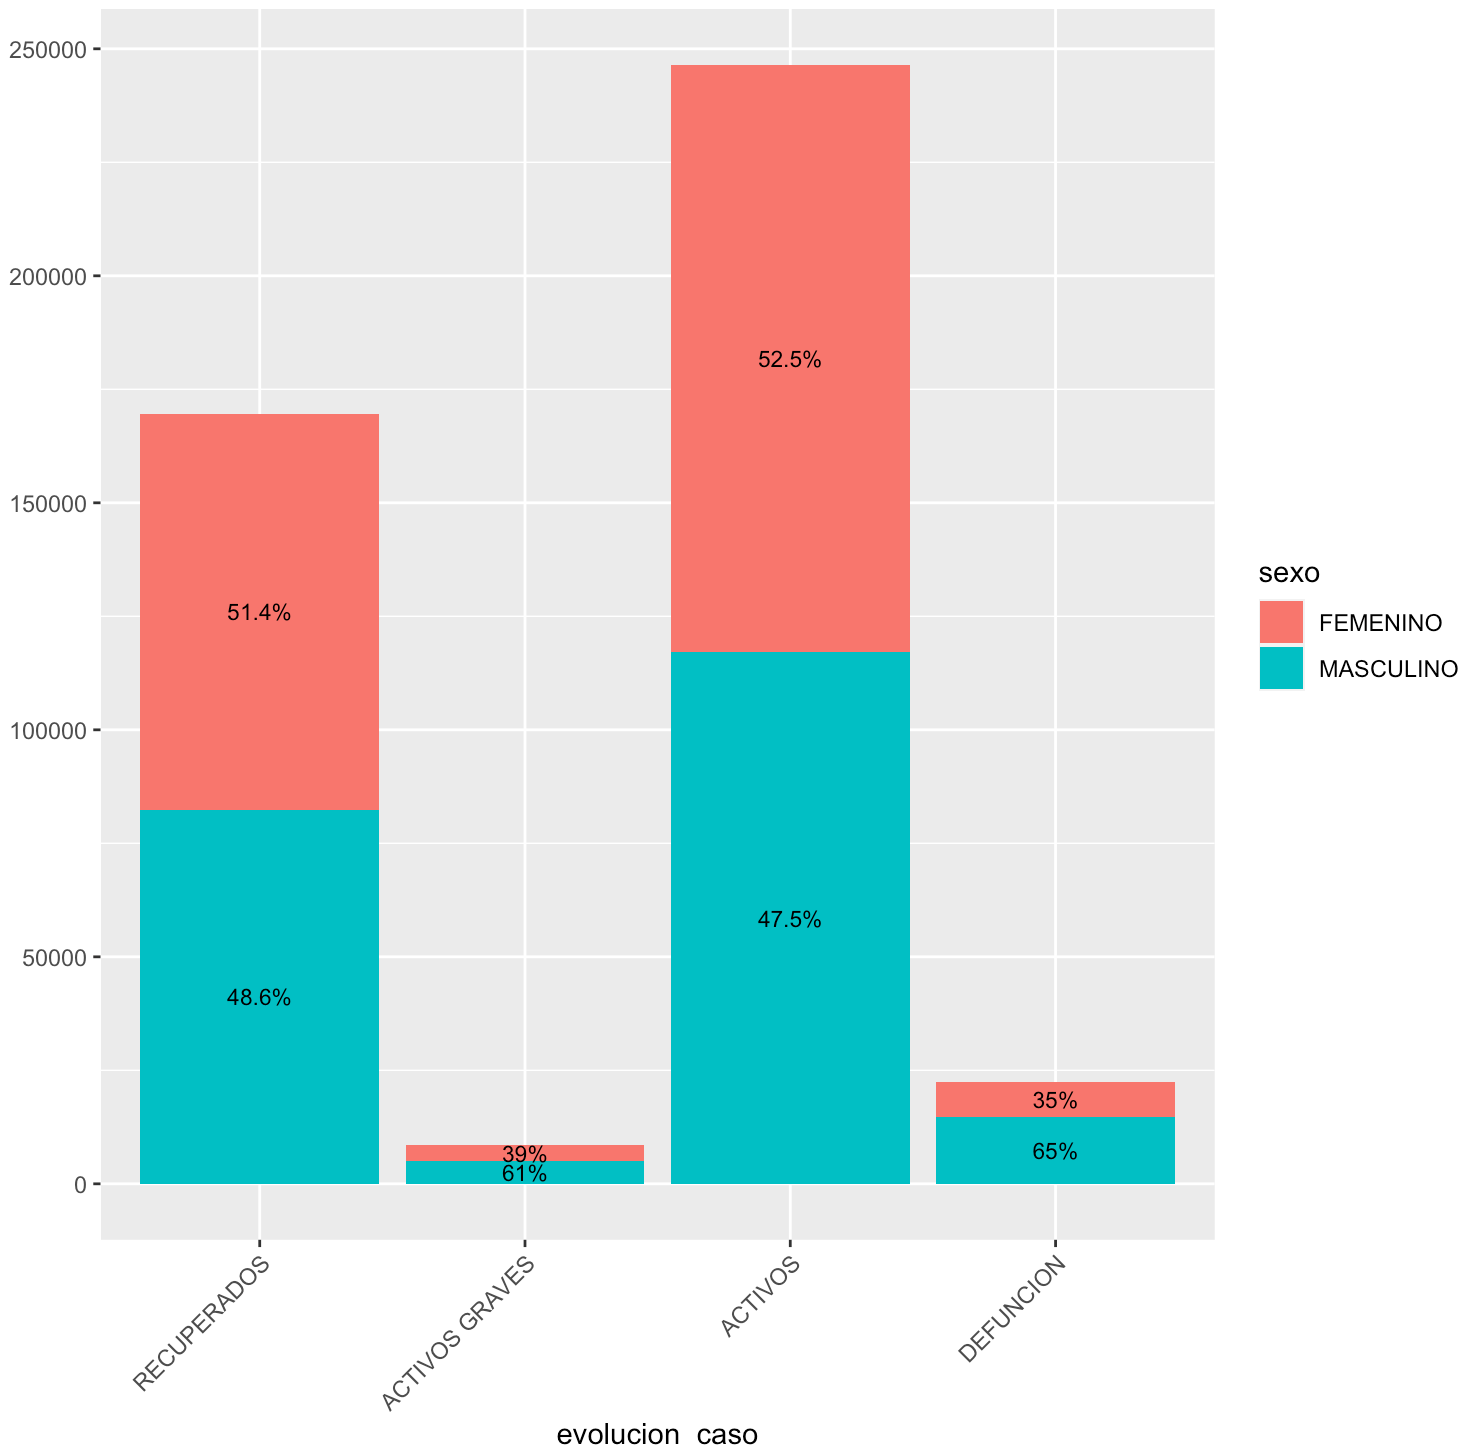

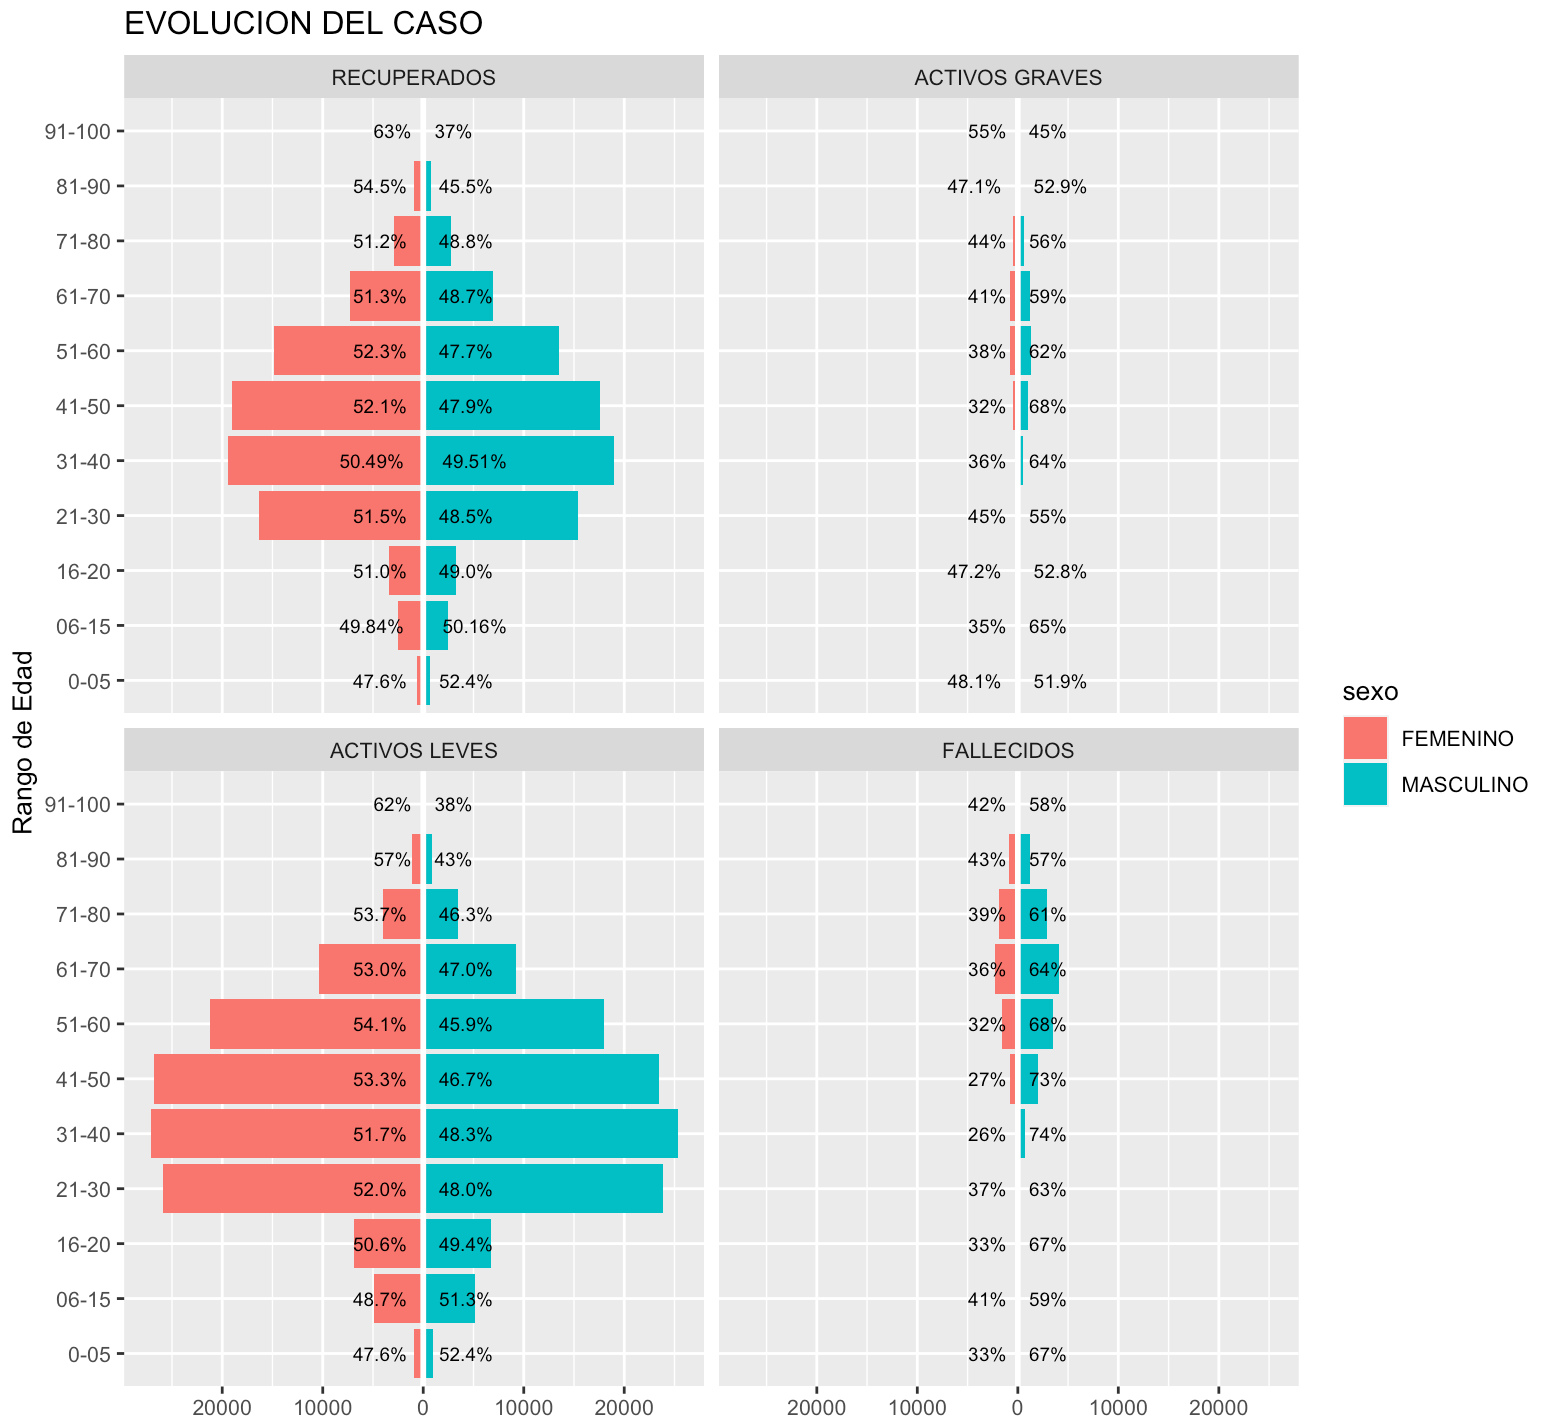

### More cleaning

In [37]:
# Percent with "SE IGNORA"
pd.set_option('display.max_rows', None)
percent_missing = round(sinave3[sinave3 == 'SE IGNORA'].count() * 100 / len(sinave3),2)
missing_value_df2 = pd.DataFrame({'percent_missing': percent_missing})

In [38]:
missing_value_df2

,percent_missing
origen,0.00
sector,0.00
cve_entidad_unidad_medica,0.00
entidad_unidad_medica,0.00
delegacion_unidad_medica,0.00
unidad_medica,0.00
fecha_de_registro,0.00
sexo,0.00
entidad_residencia,0.00
cve_entidad_residencia,0.00


In [39]:
# Removes extra spaces before and after each value of each column so it's easier to aggregate unique discrete values

sinave3 = sinave3.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


In [40]:
sinave4 = sinave3.copy()

In [41]:
# Nos quedamos solo con las filas de los SINTOMAS que sean o SI o NO

sintomas_list = ['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis']
for i in sintomas_list:
    sinave4 = sinave4[sinave4[i].isin(['SI', 'NO'])]
    sinave4 = sinave4[sinave4[i]!= 'SE IGNORA']

In [42]:
# for i in sintomas_list:
#     print(i)
#     print('')
#     print(sinave4[i].unique())
#     print('-----------')

In [43]:
# Nos quedamos solo con las filas de los PATOLOGIAS que sean o SI o NO

patologias_list = ['diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo']

for i in patologias_list:
    sinave4 = sinave4[sinave4[i].isin(['SI', 'NO'])]
    sinave4 = sinave4[sinave4[i]!= 'SE IGNORA']

In [44]:
# Convertimos en 1,0 los SI, NO
sinave4.replace(to_replace=['SI','NO'], 
                                     value=[1,0],inplace=True)

In [45]:
# for i in patologias_list:
#     print(i)
#     print('')
#     print(sinave4[i].unique())
#     print('-----------')

In [46]:
sinave4.shape

(341990, 74)

### Correlation Matrix

### Correlation matrix: SINTOMAS

In [47]:
# Create new dataframe just with sympthoms
sinave4_sintomas_corr = sinave4[['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis']]

In [48]:
sinave4_sintomas_corr.head(2)

,fiebre,tos,odinofagia,disnea,irritabilidad,diarrea,dolor_toracico,calofrios,cefalea,mialgias,artralgias,ataque_al_estado_general,rinorrea,polipnea,vomito,dolor_abdominal,conjuntivitis,cianosis
2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0


In [49]:
# # Determinamos las correlaciones entre las variables
# fig, ax = plt.subplots(figsize=(10,10))

# df_correlation1 = sinave4_sintomas_corr.corr()
# # corr = df_correlation.corr()

# mask = np.triu(np.ones_like(df_correlation1, dtype=bool))
# color_map = sns.diverging_palette(0, 10, as_cmap=True)
# sns.heatmap(df_correlation1,
#             cmap="viridis",
#             mask=mask,
#             vmax=1,
#             vmin=-1,
#             square=True,
#             linewidth=.8,
#             cbar_kws={"shrink": .5},
#             ax=ax
# );

<AxesSubplot:>

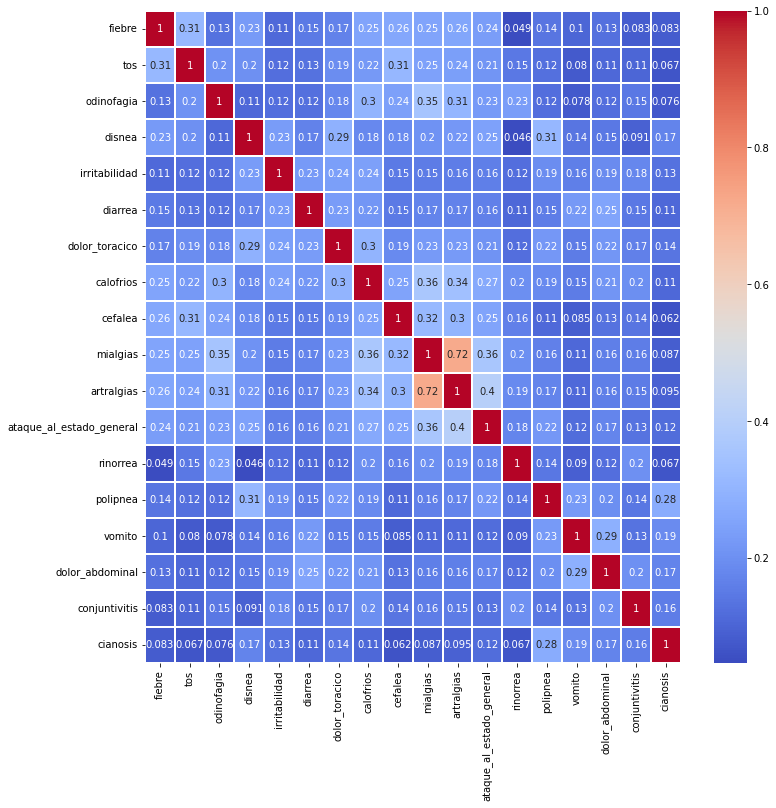

In [51]:
# Determinamos las correlaciones entre las variables

f, ax = plt.subplots(figsize=(12, 12))

#Generate correlation matrix
df_correlation1 = sinave4_sintomas_corr.corr()

#Plot using seaborn library
sns.heatmap(df_correlation1, annot = True, cmap='coolwarm',linewidths=.1)

# plt.savefig('Matriz de correlacion.png')

### Correlation matrix: PATOLOGIAS

In [52]:
# Create new datframe just with pathologies
sinave4_patologias_corr = sinave4[['diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo']]

In [53]:
sinave4_patologias_corr.head()

,diabetes,epoc,asma,inmunosupresivo,hipertension,VIH_SIDA,otra_condicion,enfermedad_cardiaca,obesidad,insuficiencia_renal_cronica,tabaquismo
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,1
16,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# # Determinamos las correlaciones entre las variables
# fig, ax = plt.subplots(figsize=(10,10))

# df_correlation2 = sinave4_patologias_corr.corr()


# mask = np.triu(np.ones_like(df_correlation2, dtype=bool))
# color_map = sns.diverging_palette(0, 10, as_cmap=True)
# sns.heatmap(df_correlation2,
#             cmap="viridis",
#             mask=mask,
#             vmax=1,
#             vmin=-1,
#             square=True,
#             linewidth=.8,
#             cbar_kws={"shrink": .5},
#             ax=ax
# );

<AxesSubplot:>

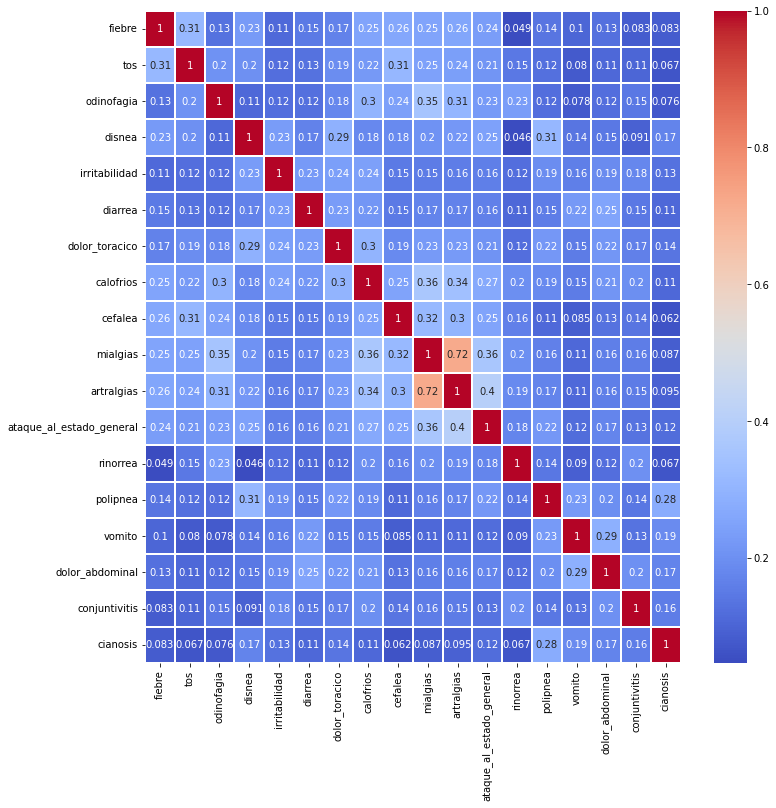

In [60]:
# Determinamos las correlaciones entre las variables

f, ax = plt.subplots(figsize=(12, 12))

#Generate correlation matrix
df_correlation2 = sinave4_patologias_corr.corr

#Plot using seaborn library
sns.heatmap(df_correlation1, annot = True, cmap='coolwarm',linewidths=.1)

# plt.savefig('Matriz de correlacion.png')

In [61]:
# Create new datframe with sympthons & pathologies
sinave4_sinpat_corr = sinave4[['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis','diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo']]

In [63]:
# # Determinamos las correlaciones entre las variables
# fig, ax = plt.subplots(figsize=(10,10))

# df_correlation3 = sinave4_sinpat_corr.corr()


# mask = np.triu(np.ones_like(df_correlation3, dtype=bool))
# color_map = sns.diverging_palette(0, 10, as_cmap=True)
# sns.heatmap(df_correlation3,
#             cmap="viridis",
#             mask=mask,
#             vmax=1,
#             vmin=-1,
#             square=True,
#             linewidth=.8,
#             cbar_kws={"shrink": .5},
#             ax=ax
# );

<AxesSubplot:>

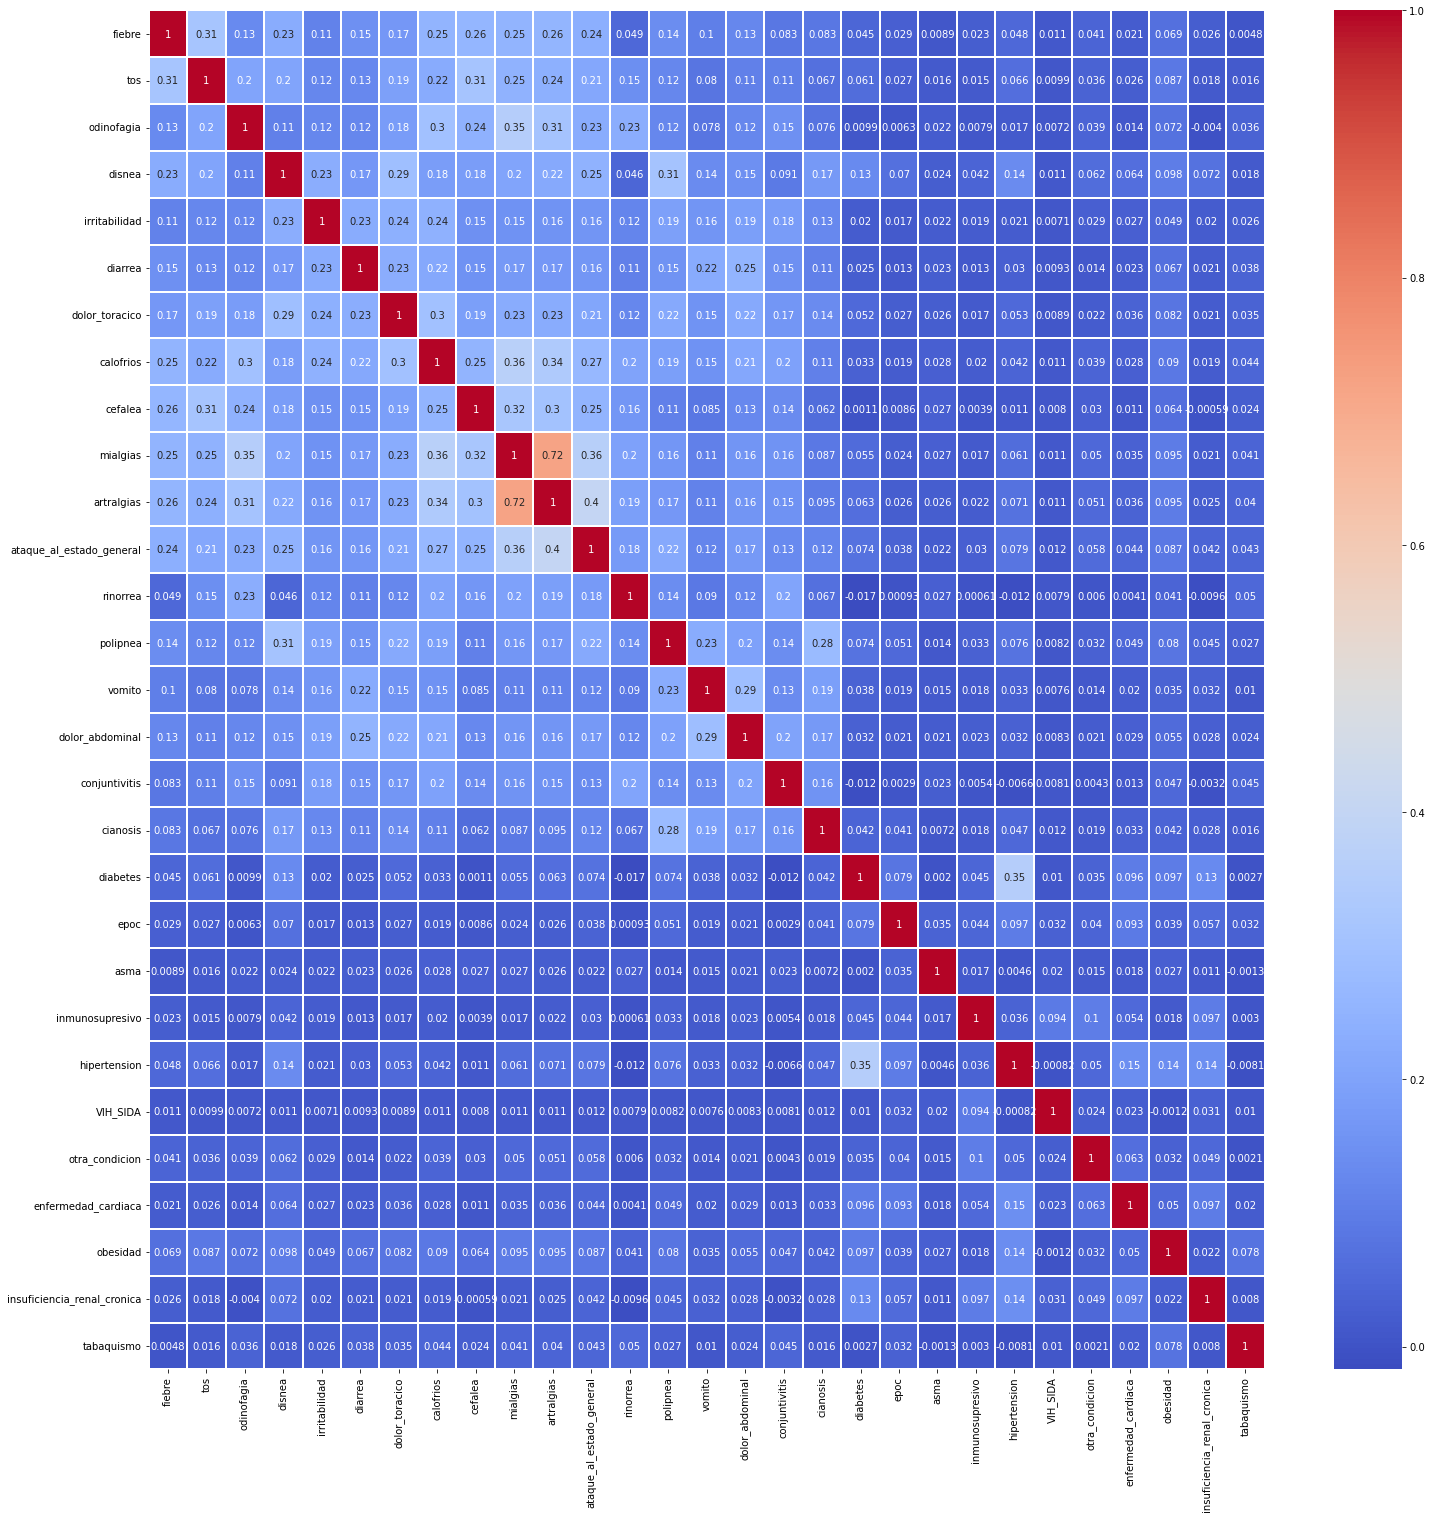

In [64]:
# Determinamos las correlaciones entre las variables

f, ax = plt.subplots(figsize=(25, 25))

#Generate correlation matrix
df_correlation3 = sinave4_sinpat_corr.corr()

#Plot using seaborn library
sns.heatmap(df_correlation3, annot = True, cmap='coolwarm',linewidths=.1)

# plt.savefig('Matriz de correlacion.png')

### Combinación de SINTOMAS más frecuentes

In [65]:
# Create new dataframe just with sympthoms
sinave4_sintomas = sinave4[['fiebre', 'tos','odinofagia','disnea','irritabilidad','diarrea','dolor_toracico','calofrios', 'cefalea','mialgias','artralgias','ataque_al_estado_general','rinorrea','polipnea','vomito','dolor_abdominal','conjuntivitis','cianosis','estado', 'sexo','rango_de_edad']]

In [66]:
given_set =  {1}
sinave4_sintomas['nsintomas'] = sinave4_sintomas.isin(given_set).sum(1)

In [67]:
sinave4_sintomas.head()

,fiebre,tos,odinofagia,disnea,irritabilidad,diarrea,dolor_toracico,calofrios,cefalea,mialgias,...,rinorrea,polipnea,vomito,dolor_abdominal,conjuntivitis,cianosis,estado,sexo,rango_de_edad,nsintomas
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,ACTIVOS LEVES,MASCULINO,51-60,3
3,1,1,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,RECUPERADOS,MASCULINO,31-40,8
7,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,ACTIVOS LEVES,MASCULINO,41-50,5
12,1,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,ACTIVOS LEVES,MASCULINO,31-40,8
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,RECUPERADOS,MASCULINO,06-15,0


In [68]:
round(sinave4_sintomas.groupby(['estado']).nsintomas.mean())

estado
ACTIVOS GRAVES    7.0
ACTIVOS LEVES     4.0
FALLECIDOS        8.0
RECUPERADOS       5.0
Name: nsintomas, dtype: float64

In [69]:
round(sinave4_sintomas.groupby(['sexo']).nsintomas.mean(),3)

sexo
FEMENINO     5.047
MASCULINO    5.051
Name: nsintomas, dtype: float64

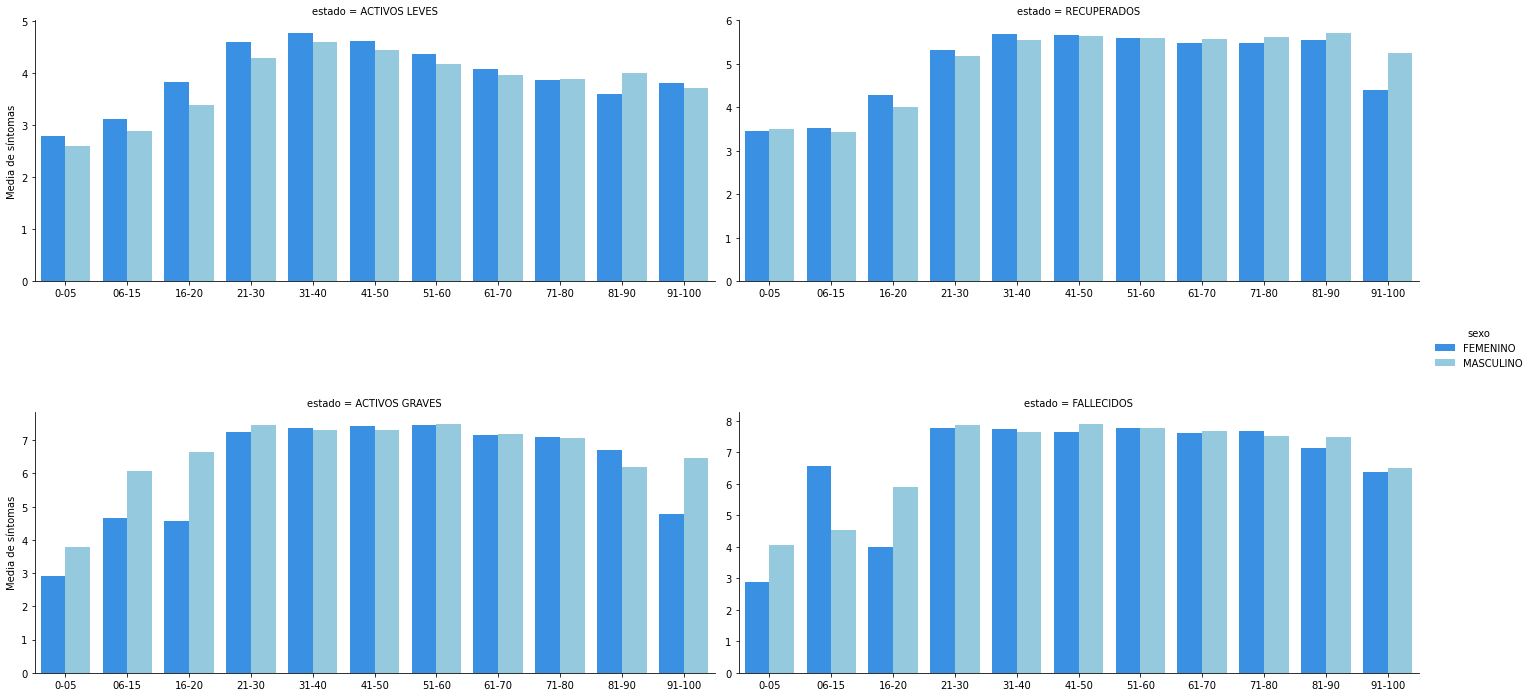

In [124]:
g = sns.catplot(x = "rango_de_edad", y = 'nsintomas', col = "estado", hue = "sexo",
                data = sinave4_sintomas.sort_values(by = "rango_de_edad"), kind = "bar",
                estimator = np.mean,
                col_wrap = 2,
#                 color = "navy",
                palette = ["dodgerblue", "skyblue"],
                ci = None,
                legend = True,
                sharey = False,
#                 order = sinave3['estado'].value_counts().index,
                height = 5, aspect = 2)


g.set_xlabels('')
g.set_ylabels('Media de síntomas')

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [71]:
sinave4_sintomas["comb_sintomas"] = sinave4_sintomas.apply(lambda x: f"""{x['fiebre']}{x['tos']}{x['odinofagia']}{x['disnea']}{x['irritabilidad']}{x['diarrea']}{x['dolor_toracico']}{x['calofrios']}{x['cefalea']}{x['mialgias']}{x['artralgias']}{x['ataque_al_estado_general']}{x['rinorrea']}{x['polipnea']}{x['vomito']}{x['dolor_abdominal']}{x['conjuntivitis']}{x['cianosis']}""",axis=1)

In [72]:
dict(sinave4_sintomas.nsintomas.value_counts(normalize=True))

{3: 0.12057954910962308,
 4: 0.10945641685429398,
 0: 0.1031843036346092,
 5: 0.09817538524518261,
 2: 0.09639755548407848,
 6: 0.08865756308663995,
 7: 0.07775665955144888,
 8: 0.06609842393052429,
 1: 0.06506623000672535,
 9: 0.052986929442381356,
 10: 0.041314073510921374,
 11: 0.0289803795432615,
 12: 0.020170180414632005,
 13: 0.01299745606596684,
 14: 0.00774584052165268,
 15: 0.004470890961724027,
 16: 0.002579022778443814,
 18: 0.0018977163074943711,
 17: 0.0014854235503962104}

In [73]:
def dame_comb_sin(string):
    datos = list(string)
    print(datos)
    decode = [pat for pat,num in zip(sintomas_list,datos) if num == "1"]
    return decode

In [74]:
sinave4_sintomas['comb_sintomas'].value_counts(normalize=True).nlargest(5)

000000000000000000    0.103184
110000001000000000    0.022094
010000000000000000    0.016577
010000001000000000    0.012723
000000001000000000    0.012278
Name: comb_sintomas, dtype: float64

In [75]:
sinave4_sintomas_recup = sinave4_sintomas[sinave4_sintomas["estado"].isin(['RECUPERADOS'])]

In [76]:
sinave4_sintomas_actleves = sinave4_sintomas[sinave4_sintomas["estado"].isin(['ACTIVOS LEVES'])]

In [77]:
sinave4_sintomas_fall = sinave4_sintomas[sinave4_sintomas["estado"].isin(['FALLECIDOS'])]

In [78]:
sinave4_sintomas_actgraves = sinave4_sintomas[sinave4_sintomas["estado"].isin(['ACTIVOS GRAVES'])]

#### SINTOMAS RECUPERADOS:

In [79]:
sinave4_sintomas_recup['comb_sintomas'].value_counts(normalize=True).nlargest(5)

000000000000000000    0.090418
110000001000000000    0.024624
010000000000000000    0.012930
010000001000000000    0.011306
000000001000000000    0.011124
Name: comb_sintomas, dtype: float64

In [80]:
dict(sinave4_sintomas_recup.nsintomas.value_counts(normalize=True))

{3: 0.11090690239830191,
 4: 0.10483672650557188,
 5: 0.1034453748883683,
 6: 0.09677335852866184,
 0: 0.09041844090962038,
 7: 0.08819227832209467,
 2: 0.08039423786288391,
 8: 0.07696439434140533,
 9: 0.06072764453878312,
 1: 0.05309138915134023,
 10: 0.04683354257535949,
 11: 0.03161280302343942,
 12: 0.021355629473357233,
 13: 0.01404294422945006,
 14: 0.008283395674514322,
 15: 0.00452998200950002,
 16: 0.0030286165434942986,
 18: 0.002743874817182869,
 17: 0.001818464206670722}

#### SINTOMAS ACTIVOS LEVES

In [81]:
sinave4_sintomas_actleves['comb_sintomas'].value_counts(normalize=True).nlargest(5)

000000000000000000    0.130565
010000000000000000    0.022405
110000001000000000    0.022375
010000001000000000    0.015916
000000001000000000    0.015202
Name: comb_sintomas, dtype: float64

In [82]:
dict(sinave4_sintomas_actleves.nsintomas.value_counts(normalize=True))

{3: 0.13959745593133724,
 0: 0.13056515019979437,
 2: 0.12262263186735378,
 4: 0.1166503506406349,
 5: 0.09234255034879353,
 1: 0.0851696558857755,
 6: 0.07703011384276276,
 7: 0.06066483188336196,
 8: 0.04913894481489007,
 9: 0.03888139788322651,
 10: 0.029966074979835854,
 11: 0.0214878984342772,
 12: 0.01438888786272373,
 13: 0.009136974577784346,
 14: 0.005288855230671666,
 15: 0.003349403079726876,
 16: 0.0017178004765511,
 18: 0.001009746516682367,
 17: 0.0009912755438162262}

#### SINTOMAS FALLECIDOS

In [83]:
sinave4_sintomas_fall['comb_sintomas'].value_counts(normalize=True).nlargest(5)

110100001111000000    0.018696
110100001000000000    0.012464
110100001001000000    0.009246
110100000000000000    0.009042
111100011111000000    0.008327
Name: comb_sintomas, dtype: float64

In [84]:
dame_comb_sin('110100001111000000')

['1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0']


['fiebre',
 'tos',
 'disnea',
 'cefalea',
 'mialgias',
 'artralgias',
 'ataque_al_estado_general']

In [85]:
dict(sinave4_sintomas_fall.nsintomas.value_counts(normalize=True))

{7: 0.12755414793624847,
 6: 0.111667347772783,
 8: 0.11079893747445851,
 9: 0.10048017981201471,
 5: 0.09956068655496526,
 4: 0.08678994687372292,
 10: 0.08556395586432367,
 11: 0.06477319166326113,
 3: 0.053841438496117694,
 12: 0.048375561912545974,
 13: 0.032488761749080504,
 2: 0.024417654270535348,
 14: 0.020944013077237433,
 15: 0.010676338373518595,
 1: 0.007253780138945648,
 16: 0.006129955046996322,
 0: 0.003524724152022885,
 17: 0.0028095627298733144,
 18: 0.00234981610134859}

#### SINTOMAS ACTIVOS GRAVES

In [86]:
sinave4_sintomas_actgraves['comb_sintomas'].value_counts(normalize=True).nlargest(5)

111111111111000000    0.022117
110100001000000000    0.019375
110100001001000000    0.013160
110100001111000000    0.011698
110100000000000000    0.010601
Name: comb_sintomas, dtype: float64

In [87]:
dict(sinave4_sintomas_actgraves.nsintomas.value_counts(normalize=True))

{6: 0.1222811186254798,
 5: 0.11752878815573022,
 7: 0.11222811186254798,
 4: 0.1074757813927984,
 8: 0.1027234509230488,
 9: 0.08316578322061781,
 3: 0.06799488210564796,
 10: 0.06397367940047523,
 12: 0.0573935295192835,
 11: 0.048985560226649606,
 13: 0.028331200877353316,
 2: 0.027417291171632243,
 14: 0.018278194114421494,
 15: 0.013891427526960336,
 1: 0.01334308170352769,
 0: 0.007494059586912813,
 16: 0.0027417291171632245,
 18: 0.0027417291171632245,
 17: 0.0020106013525863645}

### Combinación de PATOLOGIAS más frecuentes

In [88]:
# Create new datframe just with pathologies
sinave4_patologias = sinave4[['diabetes', 'epoc', 'asma', 'inmunosupresivo','hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca','obesidad', 'insuficiencia_renal_cronica', 'tabaquismo','sexo','estado','rango_de_edad']]

In [89]:
given_set =  {1}
sinave4_patologias['npatologias'] = sinave4_patologias.isin(given_set).sum(1)

In [90]:
# sinave4_patologias.groupby(['estado', 'rango_de_edad']).npatologias.value_counts()

In [91]:
# round(sinave4_patologias.groupby(['sexo','rango_de_edad',"estado"]).npatologias.mean(),3)

In [92]:
round(sinave4_patologias.groupby(['estado']).npatologias.mean(),3)

estado
ACTIVOS GRAVES    1.042
ACTIVOS LEVES     0.491
FALLECIDOS        1.366
RECUPERADOS       0.578
Name: npatologias, dtype: float64

In [134]:
round(sinave4_patologias.groupby(['sexo','rango_de_edad']).npatologias.mean(),3)

sexo       rango_de_edad
FEMENINO   0-05             0.119
           06-15            0.089
           16-20            0.164
           21-30            0.284
           31-40            0.386
           41-50            0.554
           51-60            0.819
           61-70            1.119
           71-80            1.296
           81-90            1.368
           91-100           1.121
MASCULINO  0-05             0.161
           06-15            0.120
           16-20            0.211
           21-30            0.349
           31-40            0.450
           41-50            0.603
           51-60            0.805
           61-70            1.052
           71-80            1.227
           81-90            1.275
           91-100           1.236
Name: npatologias, dtype: float64

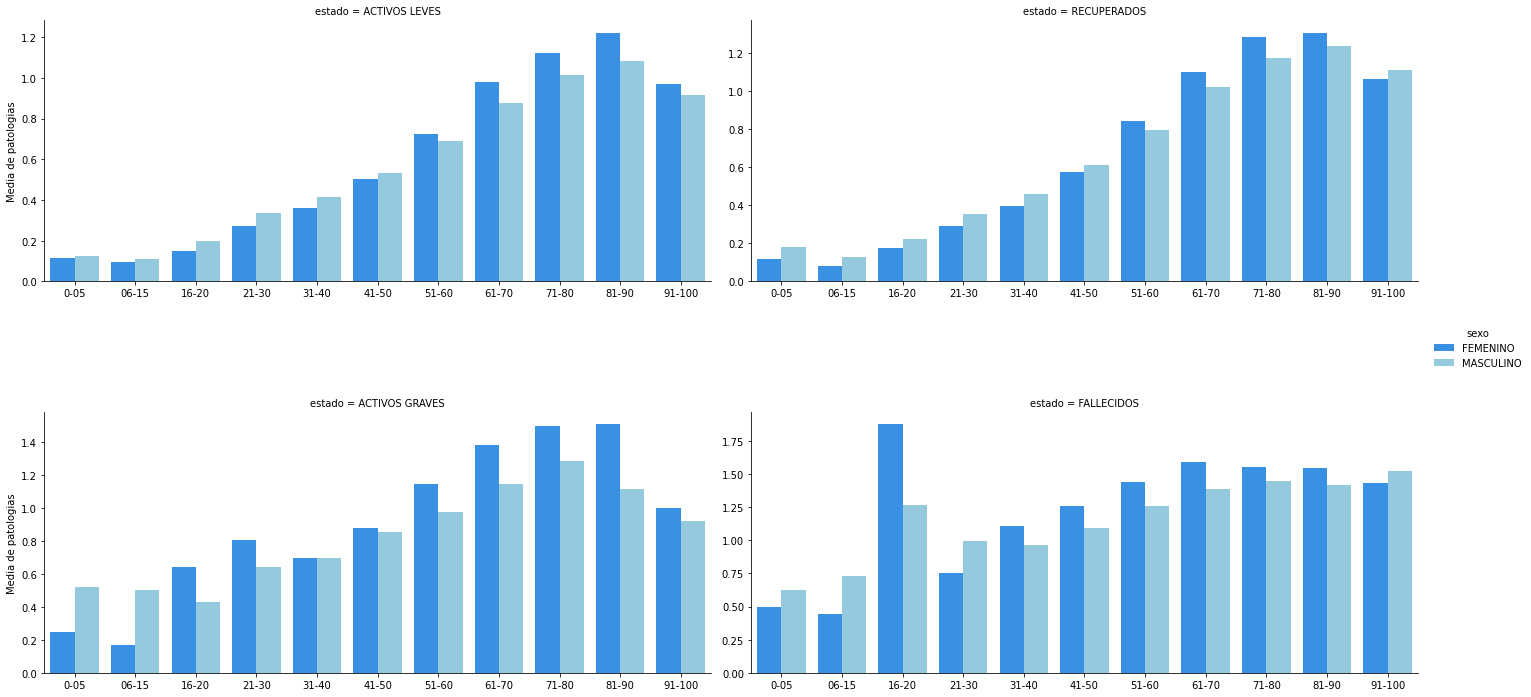

In [126]:
g = sns.catplot(x = "rango_de_edad", y = 'npatologias', col = "estado", hue = "sexo",
                data = sinave4_patologias.sort_values(by = "rango_de_edad"), kind = "bar",
                estimator = np.mean,
                col_wrap = 2,
                palette = ["dodgerblue", "skyblue"],
                ci = None,
                legend = True,
                sharey = False,
#                 order = sinave3['estado'].value_counts().index,
                height = 5, aspect = 2)


g.set_xlabels('')
g.set_ylabels('Media de patologias')

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [94]:
dict(sinave4_patologias.npatologias.value_counts(normalize=True))

{0: 0.6045644609491505,
 1: 0.2557560162577853,
 2: 0.09896488201409398,
 3: 0.031074008011930172,
 4: 0.007327699640340361,
 5: 0.0016930319599988304,
 6: 0.0003274949559928653,
 7: 0.00011696248428316618,
 11: 8.187373899821632e-05,
 8: 4.386093160618732e-05,
 10: 2.631655896371239e-05,
 9: 2.3392496856633235e-05}

In [95]:
def dame_comb_pat(string):
    datos = list(string)
    print(datos)
    decode = [pat for pat,num in zip(patologias_list,datos) if num == "1"]
    return decode

In [96]:
sinave4_patologias["comb_patologias"] = sinave4_patologias.apply(lambda x: f"""{x['diabetes']}{x['epoc']}{x['inmunosupresivo']}{x['hipertension']}{x['VIH_SIDA']}{x['otra_condicion']}{x['obesidad']}{x['tabaquismo']}""",axis=1)

In [97]:
sinave4_patologias_recup = sinave4_patologias[sinave4_patologias["estado"].isin(['RECUPERADOS'])]

In [98]:
sinave4_patologias_actleves = sinave4_patologias[sinave4_patologias["estado"].isin(['ACTIVOS LEVES'])]

In [99]:
sinave4_patologias_fall = sinave4_patologias[sinave4_patologias["estado"].isin(['FALLECIDOS'])]

In [100]:
sinave4_patologias_actgraves = sinave4_patologias[sinave4_patologias["estado"].isin(['ACTIVOS GRAVES'])]

#### PATOLOGIAS RECUPERADOS : 

In [101]:
sinave4_patologias_recup.shape

(154526, 16)

In [102]:
sinave4_patologias_recup['comb_patologias'].value_counts(normalize=True).nlargest(5)

00000000    0.625901
00000010    0.078200
00000001    0.064358
00010000    0.054321
10000000    0.037644
Name: comb_patologias, dtype: float64

In [103]:
dict(sinave4_patologias_recup.npatologias.value_counts(normalize=True))

{0: 0.6081889131926019,
 1: 0.25650699558650325,
 2: 0.09659215924828184,
 3: 0.03003378072298513,
 4: 0.006613773733870028,
 5: 0.0015143082717471493,
 6: 0.00026532751769928686,
 7: 9.70710430607147e-05,
 11: 9.05996401900004e-05,
 8: 3.8828417224285884e-05,
 10: 3.235701435357157e-05,
 9: 2.5885611482857252e-05}

#### PATOLOGIAS ACTIVOS LEVES : 

In [104]:
sinave4_patologias_actleves.shape

(162417, 16)

In [105]:
sinave4_patologias_actleves['comb_patologias'].value_counts(normalize=True).nlargest(5)

00000000    0.663213
00000001    0.077012
00000010    0.067444
00010000    0.053073
10000000    0.034356
Name: comb_patologias, dtype: float64

In [106]:
dict(sinave4_patologias_actleves.npatologias.value_counts(normalize=True))

{0: 0.6450802563771034,
 1: 0.24934581971099085,
 2: 0.08144467635777043,
 3: 0.01956076026524317,
 4: 0.003614153690808228,
 5: 0.0006587980322256907,
 6: 0.0001354538010183663,
 11: 7.388389146456343e-05,
 7: 3.694194573228172e-05,
 8: 1.847097286614086e-05,
 10: 1.847097286614086e-05,
 9: 1.2313981910760573e-05}

#### PATOLOGIAS FALLECIDOS:

In [107]:
sinave4_patologias_fall.shape

(19576, 16)

In [108]:
sinave4_patologias_fall['comb_patologias'].value_counts(normalize=True).nlargest(5)

00000000    0.311300
10010000    0.124336
00010000    0.104720
10000000    0.080098
00000010    0.067072
Name: comb_patologias, dtype: float64

In [109]:
dame_comb_pat('10010000')

['1', '0', '0', '1', '0', '0', '0', '0']


['diabetes', 'inmunosupresivo']

In [110]:
dict(sinave4_patologias_fall.npatologias.value_counts(normalize=True))

{0: 0.298375561912546,
 1: 0.2887719656722517,
 2: 0.2363608500204332,
 3: 0.12147527584797711,
 4: 0.0406620351450756,
 5: 0.010880670208418472,
 6: 0.0021454842664487125,
 7: 0.000868410298324479,
 8: 0.00025541479362484675,
 11: 0.0001021659174499387,
 10: 5.108295872496935e-05,
 9: 5.108295872496935e-05}

#### PATOLOGIAS ACTIVOS GRAVES : 

In [111]:
sinave4_patologias_actgraves.shape

(5471, 16)

In [112]:
sinave4_patologias_actgraves['comb_patologias'].value_counts(normalize=True).nlargest(5)

00000000    0.409797
10000000    0.089563
00010000    0.089198
10010000    0.085725
00000010    0.081338
Name: comb_patologias, dtype: float64

In [113]:
dict(sinave4_patologias_actgraves.npatologias.value_counts(normalize=True))

{0: 0.3949917748126485,
 1: 0.3067080972399927,
 2: 0.1944799853774447,
 3: 0.07877901663315665,
 4: 0.01846097605556571,
 5: 0.0045695485286053735,
 6: 0.0012794735880095047,
 7: 0.0003655638822884299,
 9: 0.00018278194114421494,
 8: 0.00018278194114421494}

Text(0.5, 0, 'RANGO DE EDAD')

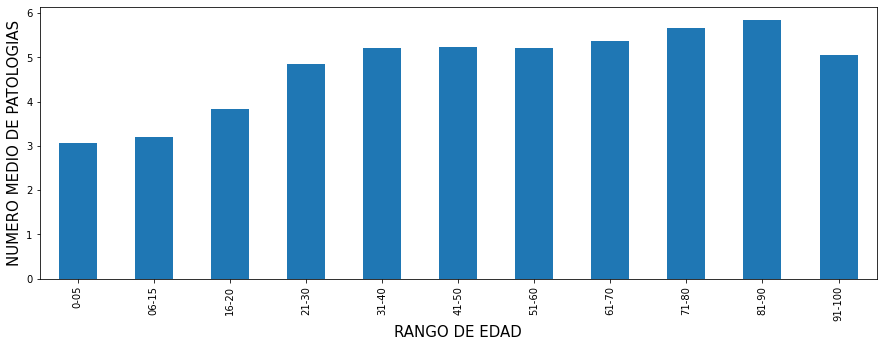

In [114]:
sinave4_sintomas.groupby('rango_de_edad').nsintomas.mean().plot.bar(figsize=(15, 5))


plt.ylabel('NUMERO MEDIO DE SINTOMAS', fontsize=15)
plt.xlabel('RANGO DE EDAD', fontsize=15)

Text(0.5, 0, 'RANGO DE EDAD')

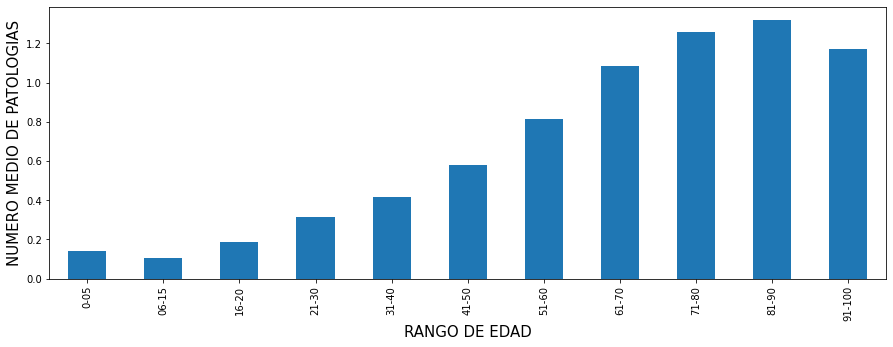

In [115]:
sinave4_patologias.groupby('rango_de_edad').npatologias.mean().plot.bar(figsize=(15, 5))


plt.ylabel('NUMERO MEDIO DE PATOLOGIAS', fontsize=15)
plt.xlabel('RANGO DE EDAD', fontsize=15)

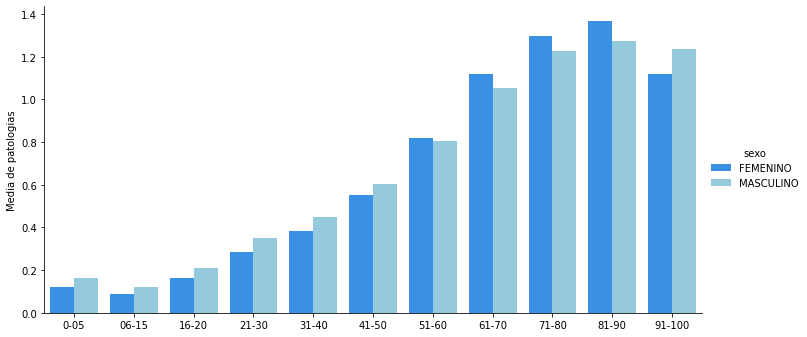

In [127]:
g = sns.catplot(x = "rango_de_edad", y = 'npatologias', hue = "sexo",
                data = sinave4_patologias.sort_values(by = "rango_de_edad"), kind = "bar",
                estimator = np.mean,
                palette = ["dodgerblue", "skyblue"],
                ci = None,
                legend = True,
                sharey = False,
#                 order = sinave3['estado'].value_counts().index,
                height = 5, aspect = 2)


g.set_xlabels('')
g.set_ylabels('Media de patologias')

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

plt.subplots_adjust(hspace=0.5)

plt.show()

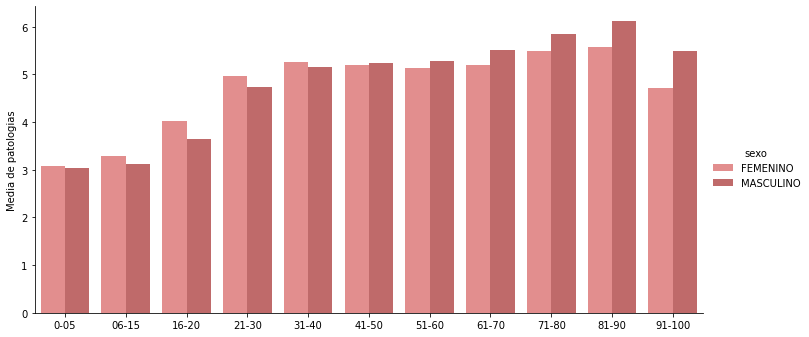

In [136]:
g = sns.catplot(x = "rango_de_edad", y = 'nsintomas', hue = "sexo",
                data = sinave4_sintomas.sort_values(by = "rango_de_edad"), kind = "bar",
                estimator = np.mean,
                palette = ["lightcoral", "indianred"],
                ci = None,
                legend = True,
                sharey = False,
                height = 5, aspect = 2)


g.set_xlabels('')
g.set_ylabels('Media de patologias')

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [131]:
sinave4.to_csv('../data/sinave4.csv', sep =',',index = False)

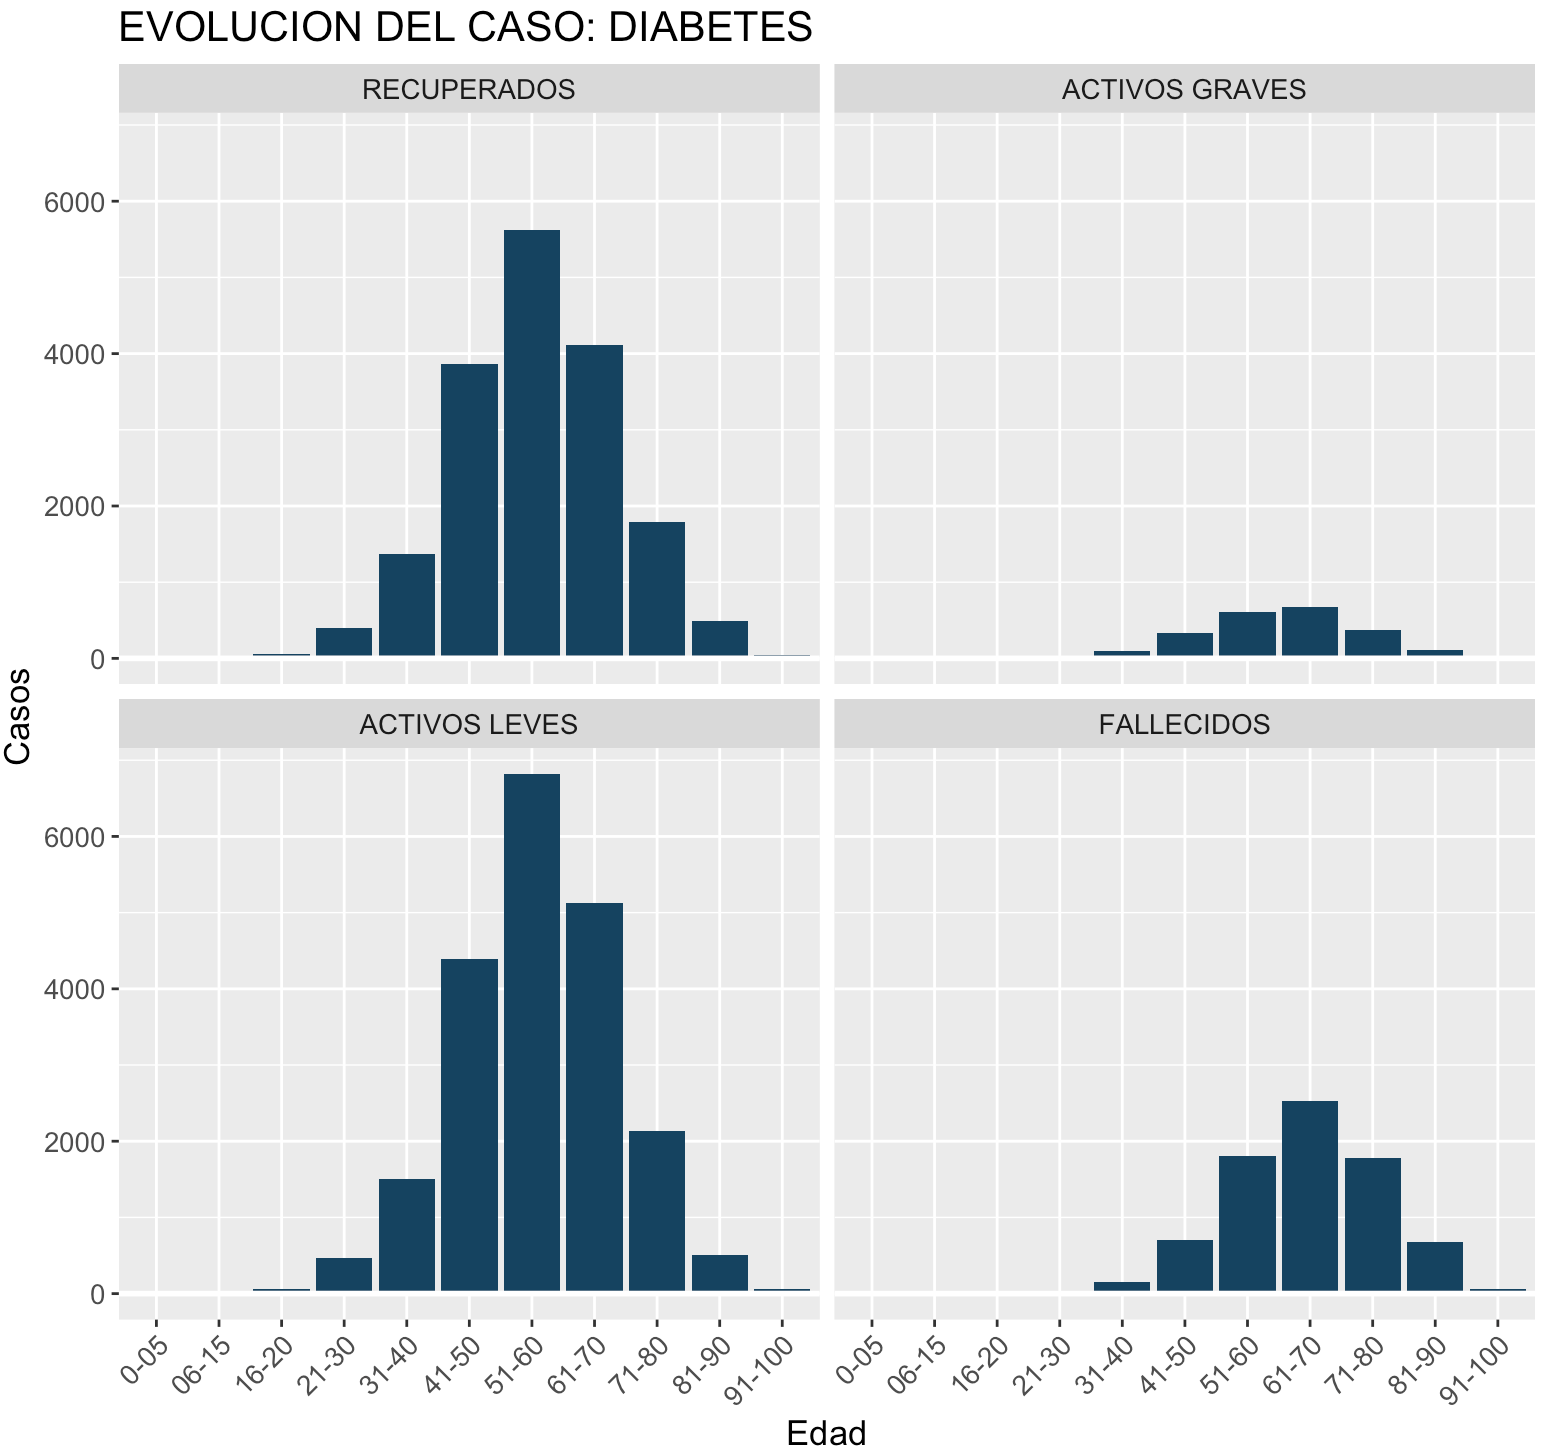

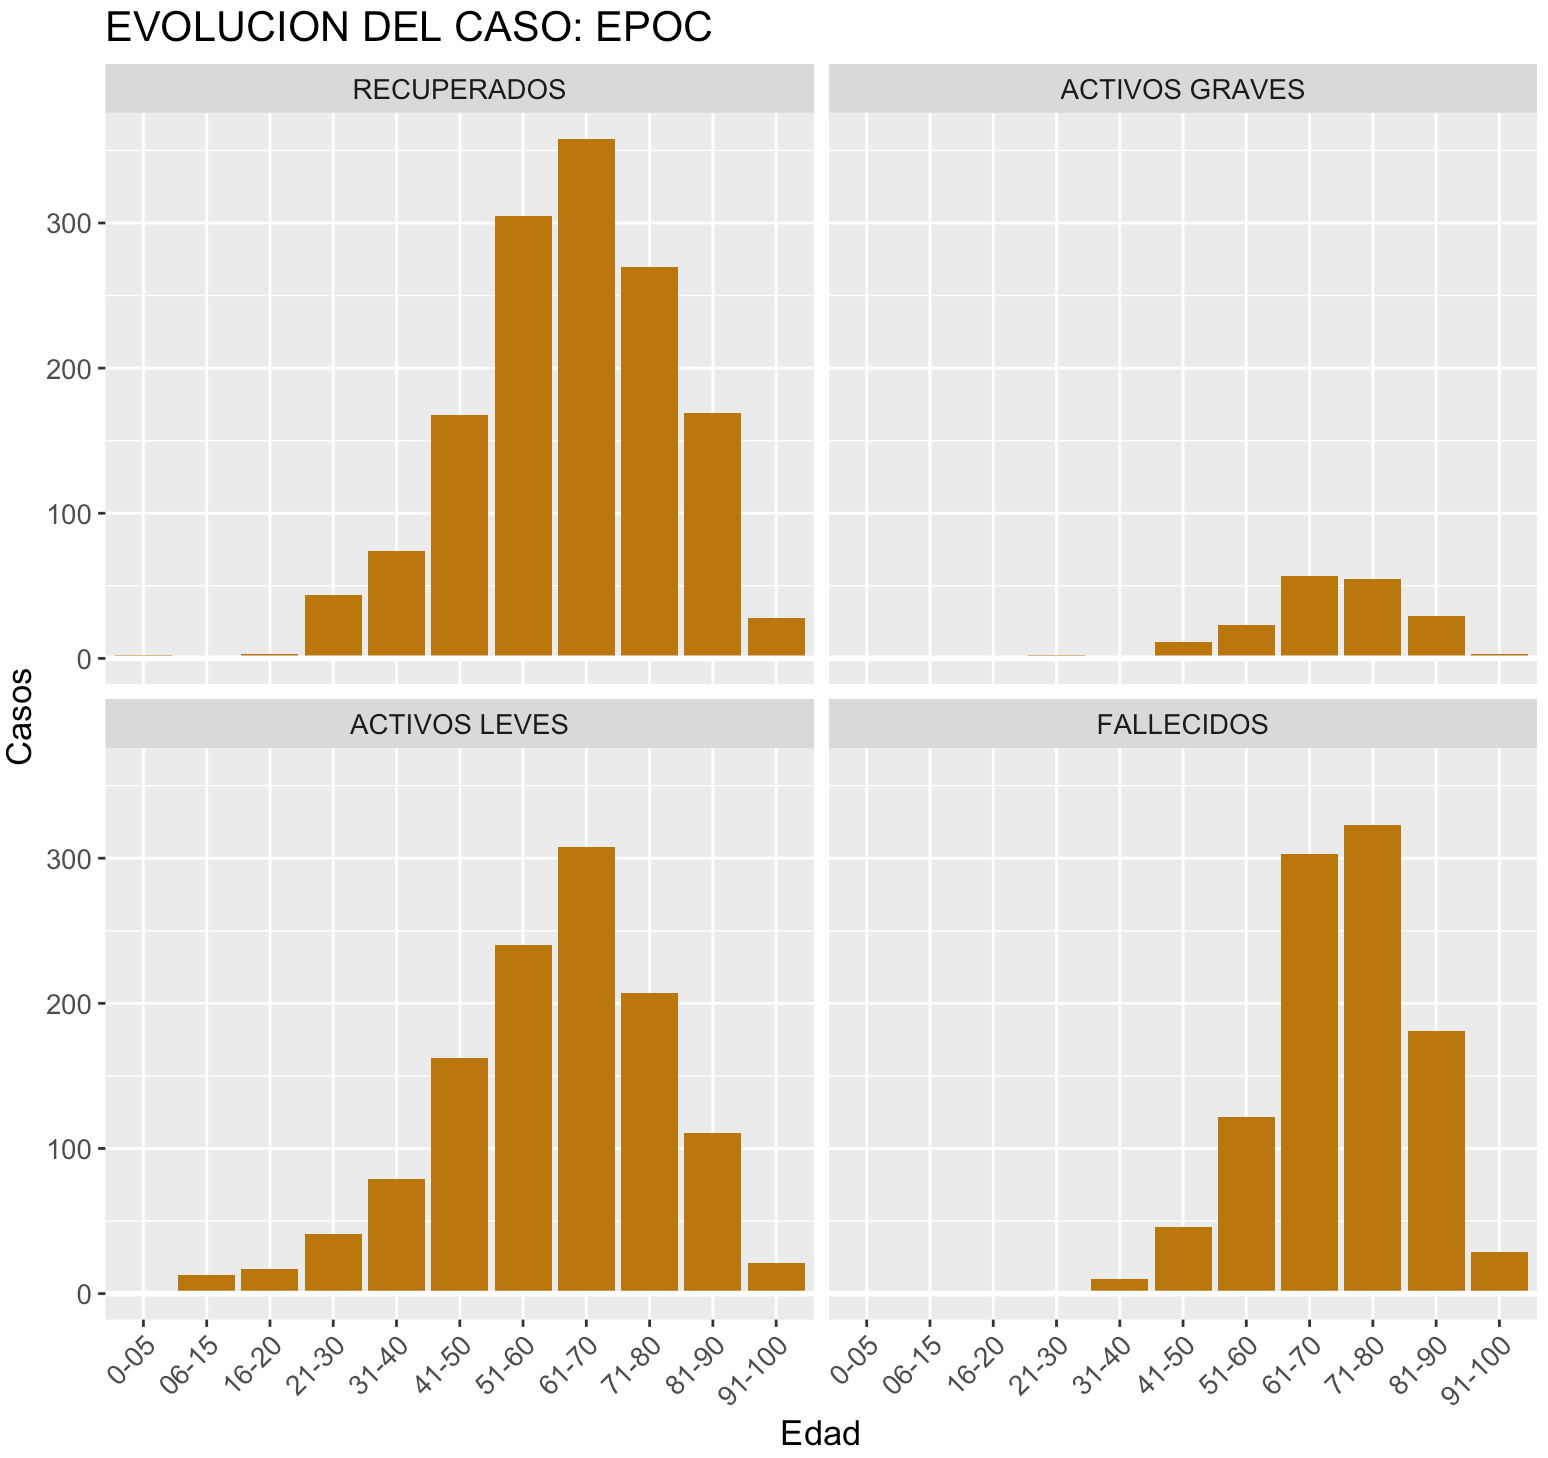